# Approximate_cdf_with_hist
> Created: Feb 1 2024 Ali Al Kadhim, HBP

## Introduction
This notebook approximates $\mathbb{P}(\lambda \le \lambda_0 | \theta) = \mathbb{E}(Z_0 | \theta)$ by histogramming, where the indicator $Z_0 = \mathbb{I}[\lambda \le \lambda_0]$ and $\lambda_0 = \lambda(D; \theta)$ is the observed value of a test statistic $\lambda$ evaluated at the observed data $D$ for a given parameter hypothesis $\theta$. We use the following algorithm, where $\theta = (a, b)$ are two $\texttt{Pythia8}$ tune parameters.

  1. Create histogram $h_w \gets \text{histogram}(a, b, \text{weight}=Z_0)$
  1. Create histogram $h_u \gets \text{histogram}(a, b, \text{weight}=1)$
  1. Approximate $\mathbb{P}(\lambda \le \lambda_0 | a, b)$ by $h_w \, / \, h_u$

A confidence set at confidence level (CL) $\tau = 1 - \alpha$, where $\alpha$ is the size of the test of the associated hypothesis about $\theta$, is (by construction) the set of points $(a, b)$ that satisfy the condition $\mathbb{P}(\lambda \le \lambda_0 | a, b) \leq \tau$.

In [1]:
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import importlib

from glob import glob
from tqdm import tqdm
from yoda2numpy import Yoda2Numpy

In [2]:
# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

### Get sim and new histograms as `pandas` dataframes

In [3]:
yoda2numpy = Yoda2Numpy()

files = glob('rivet_histograms/newseeds/*.yoda')
M = len(files)

# --- SIM
print(f'looping over {M:d} sim yoda files...\n')
dfsims = []
for ii in tqdm(range(M)):    
    dfsims.append( yoda2numpy.todf( yoda2numpy('sim', index=ii) ) )

# --- NEW
print(f'looping over {M:d} new yoda files...\n')
dfnews = []
for ii in tqdm(range(M)):
    dfnews.append( yoda2numpy.todf( yoda2numpy('new', index=ii) ) )

print()
key = '/ALEPH_1996_S3486095/d01-x01-y01'
dfsim = dfsims[0][key]
dfsim

looping over 1000 sim yoda files...



100%|███████████████████████████████████████| 1000/1000 [00:14<00:00, 67.69it/s]


looping over 1000 new yoda files...



100%|███████████████████████████████████████| 1000/1000 [00:15<00:00, 66.33it/s]

,xlow,xhigh,sumw,sumw2,sumwx,sumwx2,numEntries
0,0.000,0.005,9.207162,4.709544,0.029255,0.021593,18.0
1,0.005,0.010,28.644500,14.651920,0.210193,0.317386,56.0
2,0.010,0.015,18.925832,9.680732,0.234288,0.586316,37.0
3,0.015,0.020,15.856778,8.110884,0.284102,1.023680,31.0
4,0.020,0.025,10.230180,5.232828,0.235225,1.085886,20.0
5,0.025,0.030,18.414322,9.419092,0.504793,2.773457,36.0
6,0.030,0.035,10.741688,5.494468,0.355455,2.357036,21.0
7,0.035,0.040,7.161126,3.662980,0.271840,2.065958,14.0
8,0.040,0.050,4.092072,1.046566,0.187649,0.864406,16.0
9,0.050,0.060,5.882353,1.504438,0.319918,1.743721,23.0


### Get data histograms as `pandas` dataframes

In [4]:
dfdata = yoda2numpy.todf( yoda2numpy('dat') )

keydat = '/REF/ALEPH_1996_S3486095/d01-x01-y01'
dfdata[keydat]

,xval,xerr-,xerr+,yval,yerr-,yerr+
0,0.0025,0.0025,0.0025,12.3600,0.407922,0.407922
1,0.0075,0.0025,0.0025,23.3300,0.254951,0.254951
2,0.0125,0.0025,0.0025,20.2300,0.156205,0.156205
3,0.0175,0.0025,0.0025,16.6900,0.120416,0.120416
4,0.0225,0.0025,0.0025,13.4100,0.100000,0.100000
5,0.0275,0.0025,0.0025,10.7900,0.098995,0.098995
6,0.0325,0.0025,0.0025,8.8700,0.094048,0.094048
7,0.0375,0.0025,0.0025,7.4080,0.089196,0.089196
8,0.0450,0.0050,0.0050,5.9220,0.069340,0.069340
9,0.0550,0.0050,0.0050,4.5080,0.052631,0.052631


### Determine which histograms to use
Criteria:
  1. number of bins > 0
  2. histogram exists in data and simulated samples
  3. total cross section > 0.1 units

### How to proceed?
Notice (unfortunately) that the total effective counts for every histogram is different! This is a huge complication because, in principle, we would need to generate different numbers of events for every histogram. But, as is true of much of what we do in science, we should make some simplifying assumptions to reduce to complexity of the problem. 

**Assumptions**

  1. Since we are not given correlation matrices for the measured cross sections, we assume that the bin-by-bin cross section measurements are conditionally independent: given fixed values of the tune parameters the measured cross sections are statistically independent.
  2. The counts per bin are Poisson-distributed and the cross sections are just scaled values of the counts.  We can, therefore, compute the effective count in each bin using the following *ansatz*
\begin{align}
    n_i & = k_i \sigma_i,\\
    \sqrt{n_i} & = k_i \delta \sigma_i \quad \text{and, therefore, }\\
    n_i & = \left( \frac{\sigma_i}{\delta\sigma_i} \right)^2 ,
\end{align}
where $\sigma_i \pm \delta\sigma_i$ is the measured cross section in bin $i$ and $k_i$, the *effective integrated luminosity*, is the product $\epsilon_i {\cal L}$ of the efficiency times acceptance, $\epsilon_i$, and  the integrated luminosity ${\cal L}$. The total effective count for a histogram is then just $n = \sum_{i} n_i$.

Therefore, for each tune parameter point, a sufficiently large sample of simulated events will result in histograms that serve both as the predictions as well as the basis for simulating events counts in all the simulated "observed" histograms. Given our assumptions, we can write down an approximation of the statistical model, $p(X | \theta)$, where $X$ are *potentially observable* counts and $\theta$ are the tune parameters. With the assumptions above, the statistical model for the $\texttt{ALEPH}$ data can be approximated as a product of either gamma or Gaussian densities depending on the size of the effective bin counts.

In [21]:
keys = list(dfdata.keys())
keys.sort()

records = []
hist_names = []
for key in keys:
    dfdat = dfdata[key]
    yval  = dfdat['yval']
    yerr  = dfdat['yerr-']

    # ignore single count histograms
    if len(yval) < 2: continue
    
    mckey = key[4:]
    if not (mckey in dfsims[0]): continue
        
    dfMC  = dfsims[0][mckey]
    
    xlow  = dfMC.xlow
    xhigh = dfMC.xhigh
    dx = xhigh - xlow

    xsec = yval * dx
    total_xsec = xsec.sum()
    if total_xsec < 0.1: continue

    xsec_err = yerr * dx
    
    count = (xsec/xsec_err)**2  # count per bin
    total_count = count.sum()
    
    # cache histogram names
    hist_names.append(key)
    
    total_xsec_err = np.sqrt((xsec_err**2).sum())
    rel_err = 100 * total_xsec_err / total_xsec

    hname = key.split('/')[-1]
    records.append((total_count, hname, total_xsec, total_xsec_err, rel_err))

# sort according to total count
records.sort()

print('%s\t%10s     %6s %6s %10s' % \
          ('histogram', 'x-section', 'error', 'relerr', 'count'))
for total_count, hname, total_xsec, total_xsec_err, rel_err in records:
    print(f'{hname:s}\t{total_xsec:10.3f} +/- {total_xsec_err:6.3f} {rel_err:6.2f}'\
          f' {total_count:10.0f}')

histogram	 x-section      error relerr      count
d38-x01-y01	     0.637 +/-  0.064   9.97        330
d37-x01-y01	     1.444 +/-  0.118   8.20        348
d43-x01-y01	     0.617 +/-  0.037   5.95        393
d39-x01-y01	     0.827 +/-  0.057   6.89        415
d40-x01-y01	     0.123 +/-  0.006   4.97        764
d18-x01-y01	     2.001 +/-  0.075   3.75       1056
d30-x01-y01	     0.282 +/-  0.015   5.19       2574
d29-x01-y01	     4.802 +/-  0.143   2.97       2638
d26-x01-y01	     1.279 +/-  0.018   1.43       9962
d27-x01-y01	     0.605 +/-  0.012   1.95      10585
d28-x01-y01	    12.505 +/-  0.371   2.97      14042
d33-x01-y01	     0.374 +/-  0.003   0.84      20045
d06-x01-y01	     1.000 +/-  0.010   0.97      28040
d32-x01-y01	     2.051 +/-  0.014   0.69      31137
d05-x01-y01	     1.001 +/-  0.006   0.56      36541
d02-x01-y01	     0.992 +/-  0.007   0.66      63951
d03-x01-y01	     1.000 +/-  0.004   0.42      71103
d07-x01-y01	     1.002 +/-  0.006   0.62      81351
d04-x01-y01	  

### Define test statistic $\lambda$

\begin{align}
    \lambda(X; \theta) &= \sqrt{\frac{1}{N}\sum_\text{histograms} \sum_i \left( \frac{D_i - T_i(\theta)}{\delta_i} \right)^2},
\end{align}
where $N$ is the total number of bins summed over histograms and $\delta_i^2$ is the sum of the variances associated with the data $D_i$ and the theoretical prediction $T_i$ with the latter obtained via Monte Carlo simulation.

In [22]:
def test_statistic(names, dfdata, dfpred, which=0):    
    Y = 0.0
    nbins = 0
    
    for name in names:

        # get data 
        if which == 0:
            # ALEPH data
            df   = dfdata[name]
            data = df['yval']
            derr = df['yerr-']
        else:
            # Simulated data
            df   = dfdata[name[4:]]
            data = df['sumw']
            derr = np.sqrt(df['sumw2'])

        ndat = len(df)
        
        # get predictions
        df   = dfpred[name[4:]]
        npred= len(df)

        assert ndat == npred
        
        pred = df['sumw']
        perr2= df['sumw2']

        stdv = np.sqrt(derr**2 + perr2)
        stdv = np.where(stdv < 1e-3, 1, stdv)
        
        X  = (((data - pred)/stdv)**2).sum()

        # accumulate test statistic
        Y += X
        # accumulate total bin count
        nbins += ndat
        
    return np.sqrt(Y/nbins)

### Compute test statistic using observed data

In [23]:
X0 = []
for ii in tqdm(range(M)):
    X0.append( test_statistic(hist_names, dfdata, dfnews[ii], which=0) )
X0 = np.array(X0)

100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 249.93it/s]


### Get best fit values of $a$ and $b$
We get the best fit value by finding the point $(a, b)$ yielding the smallest value of the test statistic.

In [24]:
df = pd.read_csv('a_b_samples_uniform_1.csv')

K_best = np.argmin(X0)   # file with minimum value of test statistic
dfbest = dfnews[K_best]

a_best = df.a.iloc[K_best]
b_best = df.b.iloc[K_best]
count  = dfbest[hist_names[0][4:]].numEntries.sum()
print(f'k: {K_best:5d}\ta: {a_best:10.3f}\tb: {b_best:10.3f}\ttotal count: {count:10.0f}')

dfbest[hist_names[0][4:]][:10]

k:   408	a:      0.741	b:      0.988	total count:      49999


,xlow,xhigh,sumw,sumw2,sumwx,sumwx2,numEntries
0,0.000,0.005,11.824,0.047296,0.040673,0.030584,2956.0
1,0.005,0.010,23.464,0.093856,0.176105,0.273884,5866.0
2,0.010,0.015,20.396,0.081584,0.253187,0.637155,5099.0
3,0.015,0.020,16.940,0.067760,0.294970,1.034157,4235.0
4,0.020,0.025,13.688,0.054752,0.306313,1.376525,3422.0
5,0.025,0.030,10.976,0.043904,0.301065,1.656309,2744.0
6,0.030,0.035,8.996,0.035984,0.291708,1.895592,2249.0
7,0.035,0.040,7.464,0.029856,0.279606,2.097975,1866.0
8,0.040,0.050,6.060,0.012120,0.270879,1.215698,3030.0
9,0.050,0.060,4.594,0.009188,0.251323,1.378791,2297.0


### Plot best-fit distributions

In [25]:
hists = []
for name in hist_names:
    data = dfdata[name]
    yval = data['yval']
    yerr = data['yerr-']

    # get predictions
    key  = name[4:]
    
    pred = dfbest[key]
    pval = pred['sumw']
    perr = np.sqrt(pred['sumw2'])
    edges= dfbest[key]['xlow']
    
    name = name.split('/')[-1]
    hists.append((name, edges, yval, pval))

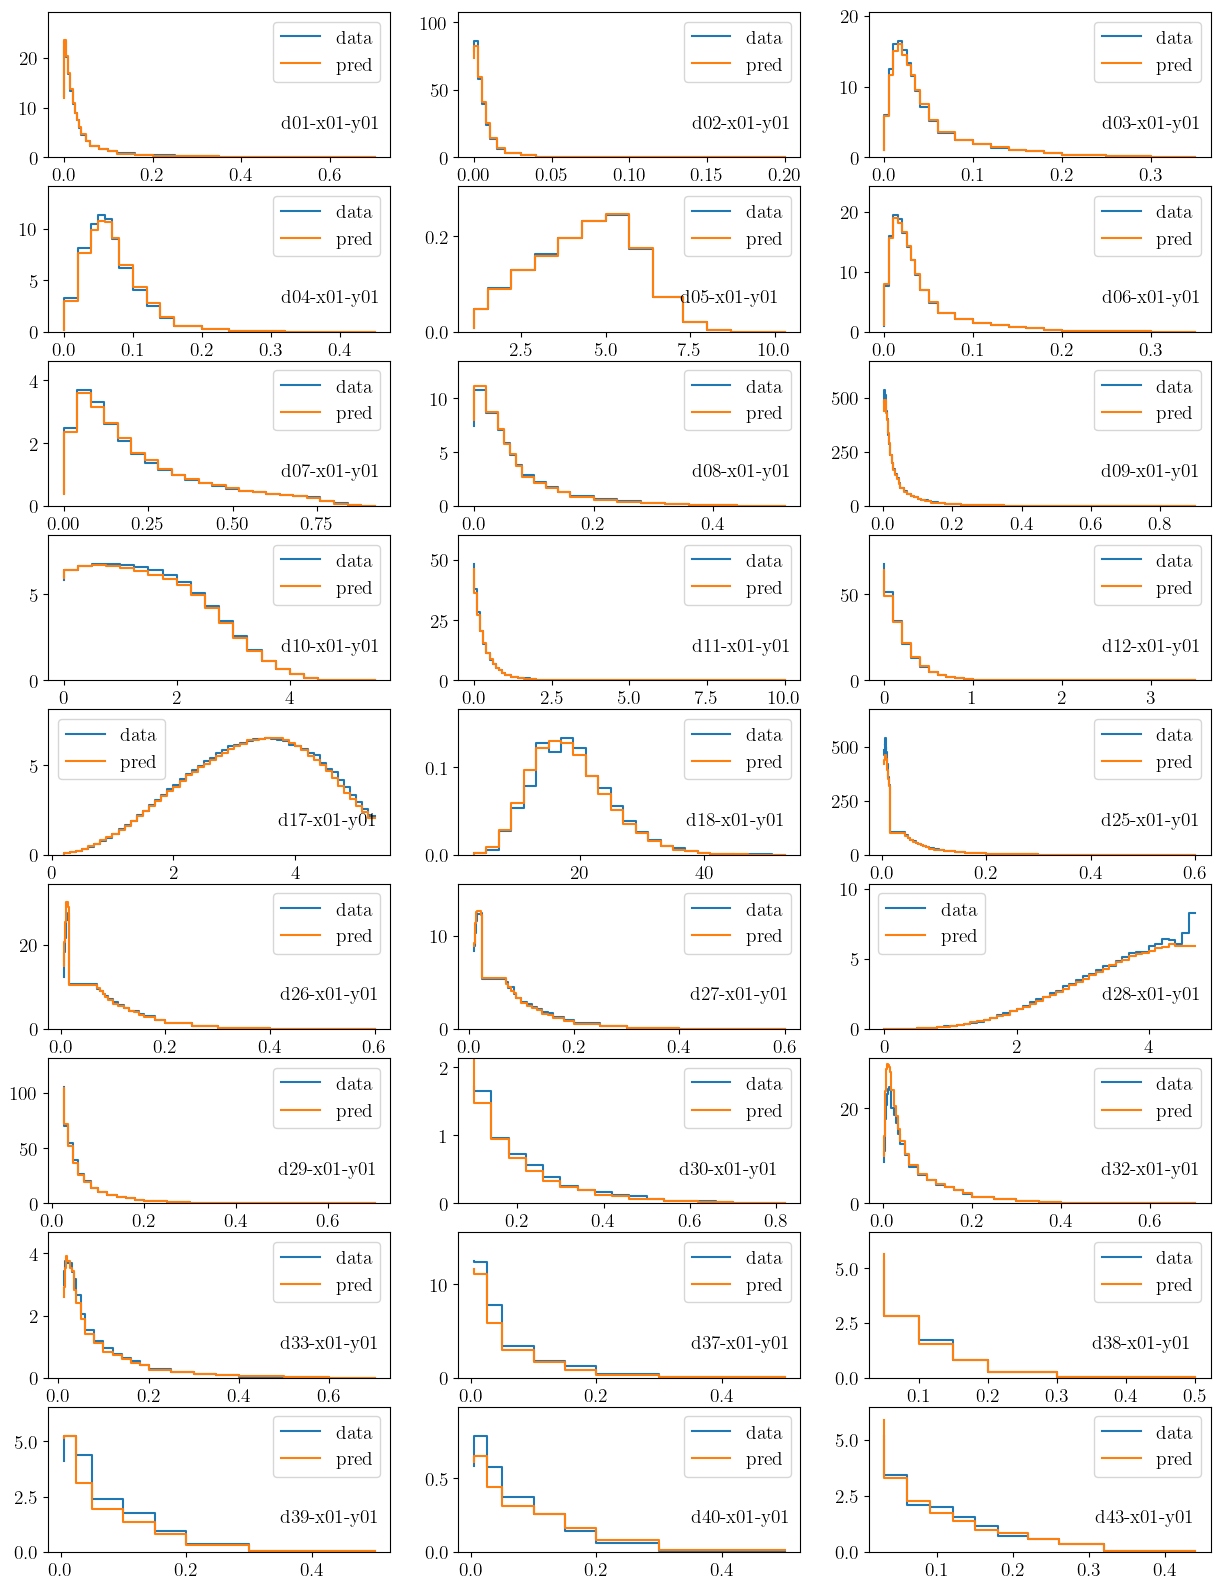

In [26]:
def plot_dist(hist_names, hists, filename='fig_bestfit_dist.png'):
    
    def plt_sim_data_hist(ax, hist):
        name, edges, hdat, hsim = hist
        
        xmin = 0
        xmax = edges.max()
        ax.set_ylim(xmin, xmax)
        
        ymin = 0
        ymax = 1.25 * hdat.max()
        ax.set_ylim(ymin, ymax)

        ax.text(xmin + 0.7*(xmax-xmin), ymin + 0.2*(ymax-ymin), name)
        
        ax.step(y=hdat, x=edges, label='data')
        ax.step(y=hsim, x=edges, label='pred')
        ax.legend()
        
    nhists= len(hist_names)
    ncols = 3
    nrows = nhists // ncols
    nhists= nrows * ncols
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 20), edgecolor='k')
    ax = ax.ravel()
    for hist_ind, hist in enumerate(hists[:nhists]):
        plt_sim_data_hist(ax[hist_ind], hist)
        
    plt.savefig(filename)   
    
plot_dist(hist_names, hists)

### Compute the 3 test statistics
To test the procedure, we'll use the simulated data corresponding to the best fit point as the "observed" data in lieu of the ALEPH data. We do this so that the simulated data have the same statistical power as the *fixed* "observed" data since they have the same integrated luminosity.
To use the ALEPH data the simulated data needs to match the statistical power of the former, that is, the simulated data must be sampled from the same distribution as the observed data except that the simulated data, necessarily, are sampled using different hypotheses for the tune parameters.

  1. `l0` = $\lambda_0(D; \theta)$ computed with *fixed* "observed" data and predictions at $\theta_i$.
  2. `lp` = $\lambda^\prime({\cal D}^\prime; \theta)$ computed with simulated data at $\theta^\prime_i$ and predictions at $\theta_i$.
  3. `l`  = $\lambda({\cal D}; \theta)$ with simulated data and predictions both at $\theta_i$.

In [27]:
# randomly shuffle integers 0 to M-1
jj = np.array(list(range(M)))
np.random.shuffle(jj)

# 1. test statistic with "observed" data
l0 = []
for ii in tqdm(range(M)):
    l0.append( test_statistic(hist_names, dfbest, dfnews[ii], which=1) )
l0 = np.array(l0)

# 2. test statistic with simulated "observed" data
lp = []
for ii in tqdm(range(M)):
    lp.append( test_statistic(hist_names, dfsims[jj[ii]], dfnews[ii], which=1) )
lp = np.array(lp)

# 3. test statistic with simulated data and predictions at the same parameter point
l  = []
for ii in tqdm(range(M)):
    l.append( test_statistic(hist_names, dfsims[ii], dfnews[ii], which=1) )
l  = np.array(l)

print(f'{l0.mean():10.3f}, {lp.mean():10.3f}, {l.mean():10.3f}')

100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 227.14it/s]

     7.506,     10.235,      0.979


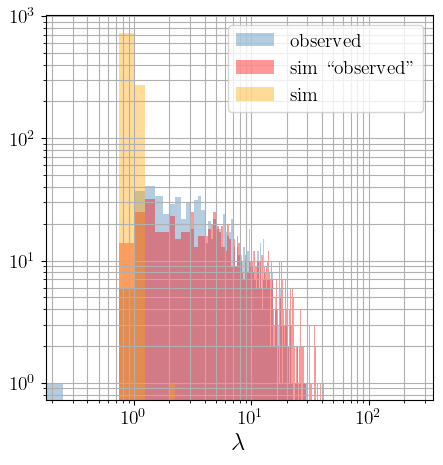

In [28]:
def plot_test_statistics(x0, xo, x, 
              xbins=1000, xmin=0, xmax=250, 
              ymin=0, ymax=800, ftsize=18):
    
    # create an empty figure
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows, ncols, index)
    #ax.set_xlim(xmin, xmax)
    ax.set_xlabel('$\lambda$', fontsize=ftsize)  
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.hist(x0, bins=xbins, range=(xmin, xmax), color='steelblue', alpha=0.4, label='observed') 
    ax.hist(xo, bins=xbins, range=(xmin, xmax), color='red', alpha=0.4, label='sim ``observed"')
    ax.hist(x,  bins=xbins, range=(xmin, xmax), color='orange', alpha=0.4, label='sim') 

    ax.legend()
  
    ax.grid(True, which="both", linestyle='-')

    plt.show()
    
plot_test_statistics(l0, lp, l)

### Compute indicators $Z_0 = \mathbb{I}[\lambda \leq \lambda_0]$ and $Z^\prime = \mathbb{I}[\lambda \leq \lambda^\prime]$

In [29]:
df['l0'] = l0
df['lp'] = lp
df['l']  = l
df['Z0'] = (l <= l0).astype(int)
df['Zp'] = (l <= lp).astype(int)

print(f'{df.l0.mean():10.2f}, {df.lp.mean():10.2f}, {df.l.mean():10.2f}')
print(f'{df.Z0.mean():10.4f}, {df.Zp.mean():10.4f}')

df[:10]

      7.51,      10.24,       0.98
    0.9960,     0.9940


,Unnamed: 0,a,b,l0,lp,l,Z0,Zp
0,0,0.890731,1.773921,4.893057,14.840858,2.199495,1,1
1,1,1.306220,1.490305,1.312000,11.018291,1.001977,1,1
2,2,1.653587,0.538929,16.438451,26.601965,0.954788,1,1
3,3,0.666805,1.375998,4.338279,3.324299,0.982656,1,1
4,4,1.105232,1.243956,1.470954,1.041777,1.061903,1,0
5,5,1.663316,0.514966,17.059907,16.762613,0.926968,1,1
6,6,0.020567,0.917892,9.064542,12.246315,0.959049,1,1
7,7,0.838095,1.297131,2.178625,7.177722,0.961769,1,1
8,8,1.597502,1.513509,3.029759,4.141842,0.972587,1,1
9,9,0.330494,0.874556,3.988953,7.089688,1.010666,1,1


### Plot confidence set based on histogramming

a(best):      0.741 b(best):      0.988


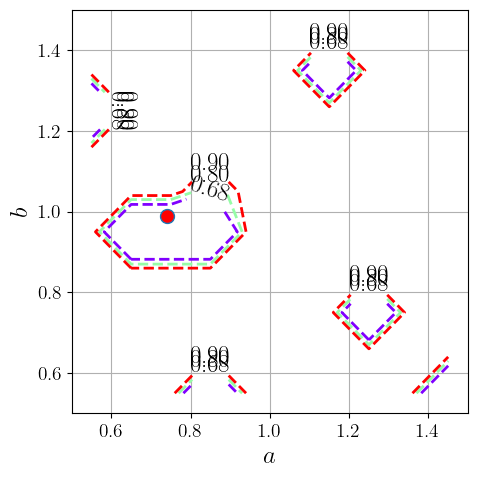

In [30]:
def plot_cdf(df, a=None, b=None,
             xbins=10, xmin=0.5, xmax=1.5, 
             ybins=10, ymin=0.5, ymax=1.5, 
             filename='fig_cdf_via_hist.png',
             fgsize=(5, 5), 
             ftsize=18):
    
    # approximate cdf via histogramming
    xrange = (xmin, xmax)
    yrange = (ymin, ymax)
        
    # weighted histogram   (count the number of ones per bin)
    hw, xe, ye = np.histogram2d(df.a, df.b, 
                                bins=(xbins, ybins), 
                                range=(xrange, yrange), 
                                weights=df.Z0)

    # unweighted histogram (count number of ones and zeros per bin)
    hu, _, _ = np.histogram2d(df.a, df.b, 
                              bins=(xbins, ybins), 
                              range=(xrange, yrange)) 
    P =  hw / (hu + 1.e-10)    
  
    # flatten arrays so that p, x, and y are 1d arrays
    # of the same length.    
    # get bin centers
    x   = (xe[1:] + xe[:-1])/2
    y   = (ye[1:] + ye[:-1])/2
    X,Y = np.meshgrid(x, y)
    x   = X.flatten()
    y   = Y.flatten()
    
    # WARNING: must transpose P so that X, Y, and P have the
    # same shape
    P   = P.T
    p   = P.flatten()
                
    # Now make plots
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fgsize)
    
    ax.set_xlim(xmin, xmax)
    #ax.set_xticks(np.linspace(xmin, xmax, 6))
    ax.set_xlabel(r'$a$', fontsize=ftsize)
    
    ax.set_ylim(ymin, ymax)
    #ax.set_yticks(np.linspace(xmin, xmax, 9))
    ax.set_ylabel(r'$b$',  fontsize=ftsize)
    
    mylevels = np.array([0.68, 0.8, 0.9])

    colormap = 'rainbow'
    
    cs = ax.contour(X, Y, P, 
                    extent=(xmin, xmax, ymin, ymax),
                    levels=mylevels,
                    linewidths=2,
                    linestyles='dashed',
                    cmap=colormap)

    ax.clabel(cs, cs.levels, 
              inline=True, 
              fontsize=18, fmt='%4.2f', 
              colors='black')

    if a != None:
        if b != None:
            print(f'a(best): {a_best:10.3f} b(best): {b_best:10.3f}')
            ax.plot([a_best], [b_best], 
                    markerfacecolor='red',
                    markersize=20, 
                    marker='.')
            
    ax.grid()

    plt.tight_layout()
    plt.savefig(filename)    
    plt.show()


plot_cdf(df, a_best, b_best)